### Import Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

### Import Dataset

In [89]:
df = pd.read_csv("Salary_Data.csv")

In [90]:
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


### Check for null values

In [91]:
print(df.isnull().values.any())
print(df.isnull().sum())

True
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


### Imputing

In [92]:
num_cols = ["Age","Years of Experience","Salary"]
cat_cols = ["Gender", "Education Level", "Job Title"]

imputer = SimpleImputer(strategy="mean")
df[num_cols] = imputer.fit_transform(df[num_cols])
imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = imputer.fit_transform(df[cat_cols])

In [93]:
print(df.isnull().values.any())
print(df.isnull().sum())

False
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


### Split Features from the Independent Variable

In [94]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

### Create Pipeline

In [95]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")

num_features = ["Age", "Years of Experience"]
cat_features = ["Gender", "Education Level", "Job Title"]

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", num_transformer, num_features),
        ("categorical", cat_transformer, cat_features)
    ]
)

joblib.dump(preprocessor, "salary_preprocessor.joblib")

['salary_preprocessor.joblib']

In [96]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", Lasso(alpha=0.5))])
joblib.dump(pipeline, "salary_pipeline.joblib")

['salary_pipeline.joblib']

### Splitting the Training Set and Test Set

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [98]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       Age  Gender    Education Level                  Job Title  \
586   25.0  Female         Bachelor's               Data Analyst   
6180  30.0  Female  Bachelor's Degree      Marketing Coordinator   
4146  28.0  Female  Bachelor's Degree      Marketing Coordinator   
1715  44.0  Female                PhD  Software Engineer Manager   
2574  54.0    Male    Master's Degree   Senior Software Engineer   
...    ...     ...                ...                        ...   
3915  39.0  Female    Master's Degree          Marketing Manager   
1428  27.0  Female    Master's Degree        Full Stack Engineer   
6537  25.0  Female        High School            Sales Executive   
4367  28.0  Female  Bachelor's Degree  Junior Software Developer   
2522  31.0  Female    Master's Degree        Full Stack Engineer   

      Years of Experience  
586                   2.0  
6180                  5.0  
4146                  2.0  
1715                 11.0  
2574                 31.0  
...            

### Create the Model and Fit to Training Data All With Pipeline

In [99]:
pipeline.fit(X_train,y_train)

/home/monarch/salaryproject/salarymodel/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127376130301.8722, tolerance: 1483175634.4668016
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('model', Lasso(alpha=0.5))])

### Predict on the Test Data

In [100]:
y_pred = pipeline.predict(X_test)

In [101]:
print(y_pred)

[ 83593.14122377 188907.2997258  160833.68627688 ...  72419.23067284
  94886.77290931  30633.47963739]


In [102]:
print(y_test)

3405     95000.0
2245    195000.0
5420    160000.0
6169    120000.0
1474    180000.0
          ...   
4618     90000.0
334      95000.0
2035     65000.0
6439     55000.0
3758     35000.0
Name: Salary, Length: 1341, dtype: float64


### Change this to a better format

In [103]:
y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

In [104]:
print(y_test_series)
print(y_pred_series)

3405     95000.0
2245    195000.0
5420    160000.0
6169    120000.0
1474    180000.0
          ...   
4618     90000.0
334      95000.0
2035     65000.0
6439     55000.0
3758     35000.0
Name: Salary, Length: 1341, dtype: float64
0        83593.141224
1       188907.299726
2       160833.686277
3       116877.066734
4       161300.191009
            ...      
1336     90879.704130
1337    109458.853617
1338     72419.230673
1339     94886.772909
1340     30633.479637
Length: 1341, dtype: float64


### Create a DataFrame for Comparison

In [105]:
comparison_df = pd.concat([y_test_series.reset_index(drop=True), y_pred_series], axis=1)
comparison_df.columns = ["Actual", "Predicted"]

print(comparison_df)

        Actual      Predicted
0      95000.0   83593.141224
1     195000.0  188907.299726
2     160000.0  160833.686277
3     120000.0  116877.066734
4     180000.0  161300.191009
...        ...            ...
1336   90000.0   90879.704130
1337   95000.0  109458.853617
1338   65000.0   72419.230673
1339   55000.0   94886.772909
1340   35000.0   30633.479637

[1341 rows x 2 columns]


### Evaluate the Model

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_series.values, y_pred_series.values)
rmse = np.sqrt(mean_squared_error(y_test_series.values, y_pred_series.values))
mae = mean_absolute_error(y_test_series.values, y_pred_series.values)
r2 = r2_score(y_test_series.values, y_pred_series.values)


In [107]:
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mae)
print("R-Squared Score: ", r2)

Mean Squared Error:  348386235.4224265
Root Mean Squared Error:  18665.107431312215
Mean Absolute Error:  13314.252456810746
R-Squared Score:  0.8780550785427441


### Visualize Actual vs. Predicted

Text(0.5, 1.0, 'Actual vs. Predicted Values')

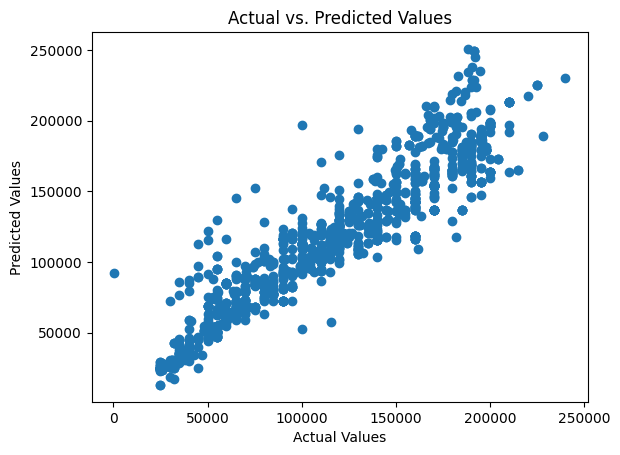

In [108]:
plt.scatter(y_test_series.values, y_pred_series.values)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

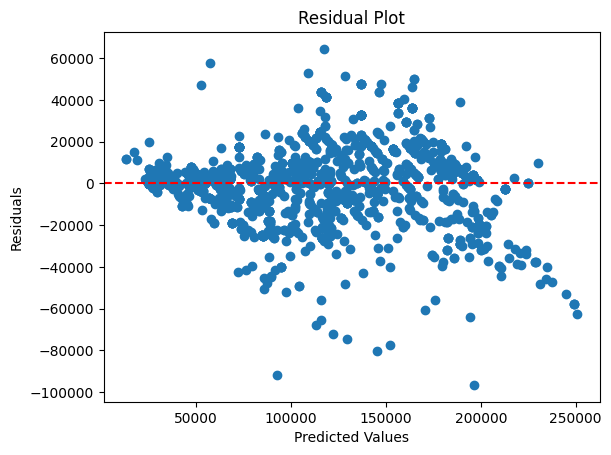

In [109]:

residuals = y_test_series.values - y_pred_series.values
plt.scatter(y_pred_series.values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Save the Lasso Regression Model

In [110]:
import joblib

joblib.dump(lasso, "lasso_model.joblib")

['lasso_model.joblib']